In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from urllib.request import urlretrieve
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducible results
np.random.seed(42)

CONVOLUTION FILTERS APPLICATION
Complete Implementation with All TODOs Addressed

1. DOWNLOADING TEST IMAGES...
Already exists: lenna.png
Already exists: mandrill.png
Already exists: cameraman.png
Using test image: lenna.png

2. LOADING AND VALIDATING IMAGES...
Manual selection: Grayscale image loaded
Manual selection: RGB image loaded
Auto-detected: Color (RGB) image
✓ Grayscale image loaded: (512, 512)
✓ RGB image loaded: (512, 512, 3)
✓ Auto-detection result: RGB

3. PREPARING CONVOLUTION KERNELS...
✓ Total kernels available: 30
✓ Kernel types: ['blur_3x3', 'blur_5x5', 'blur_7x7', 'sobel_horizontal', 'sobel_vertical', 'edge_detection', 'laplacian', 'laplacian_diagonal', 'sharpen', 'sharpen_strong', 'unsharp_mask', 'gaussian_3x3', 'gaussian_5x5', 'emboss', 'emboss_45', 'motion_blur_horizontal', 'motion_blur_vertical', 'prewitt_horizontal', 'prewitt_vertical', 'kirsch_n', 'kirsch_ne', 'high_pass', 'ridge_horizontal', 'ridge_vertical', 'random_3x3_artistic', 'random_3x3_uniform', 'rand

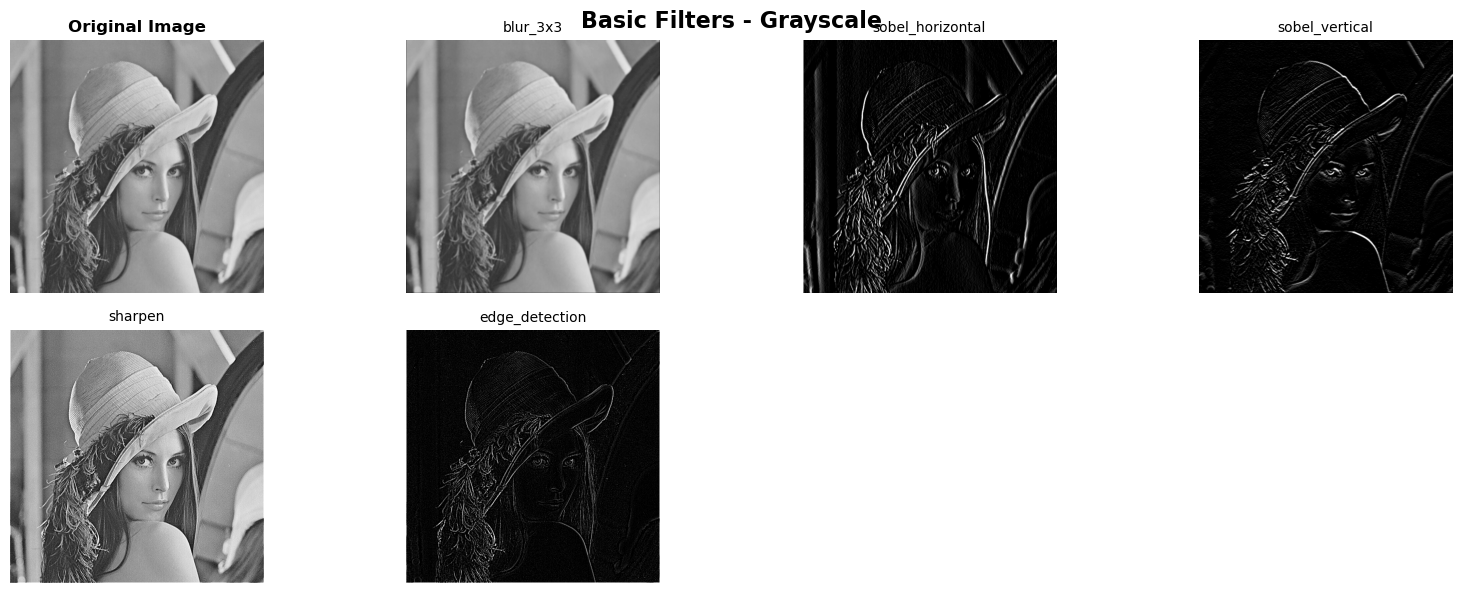

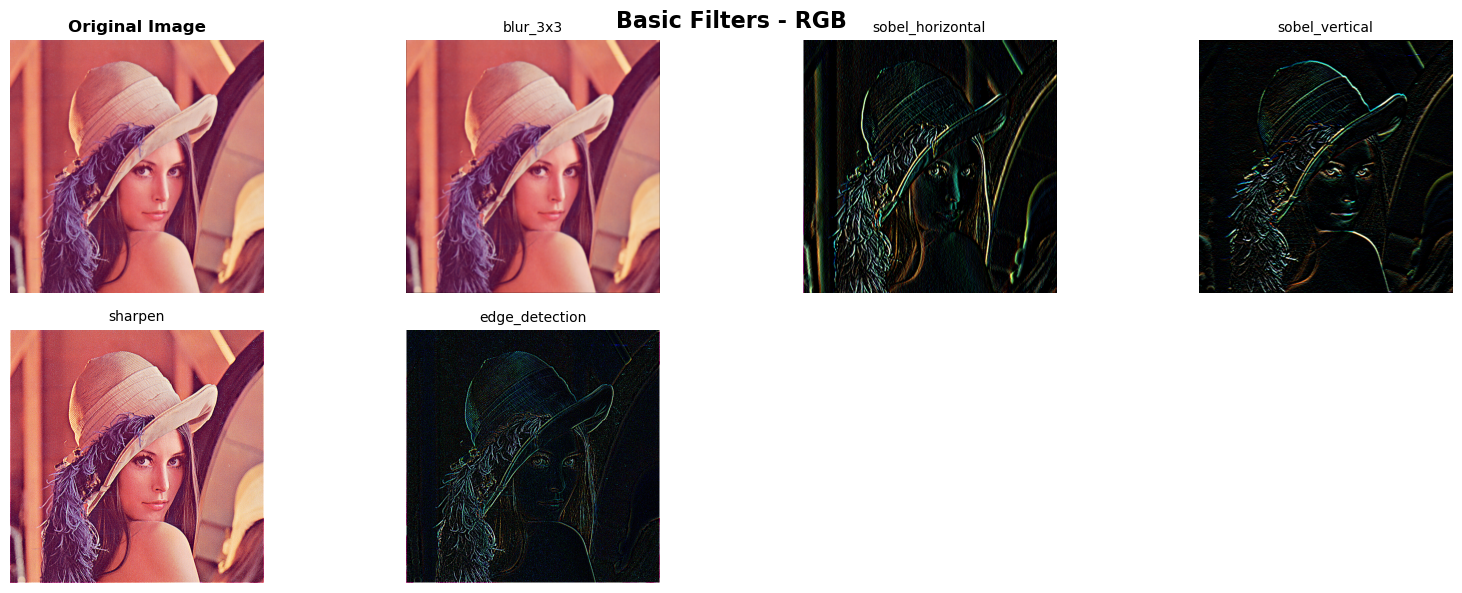

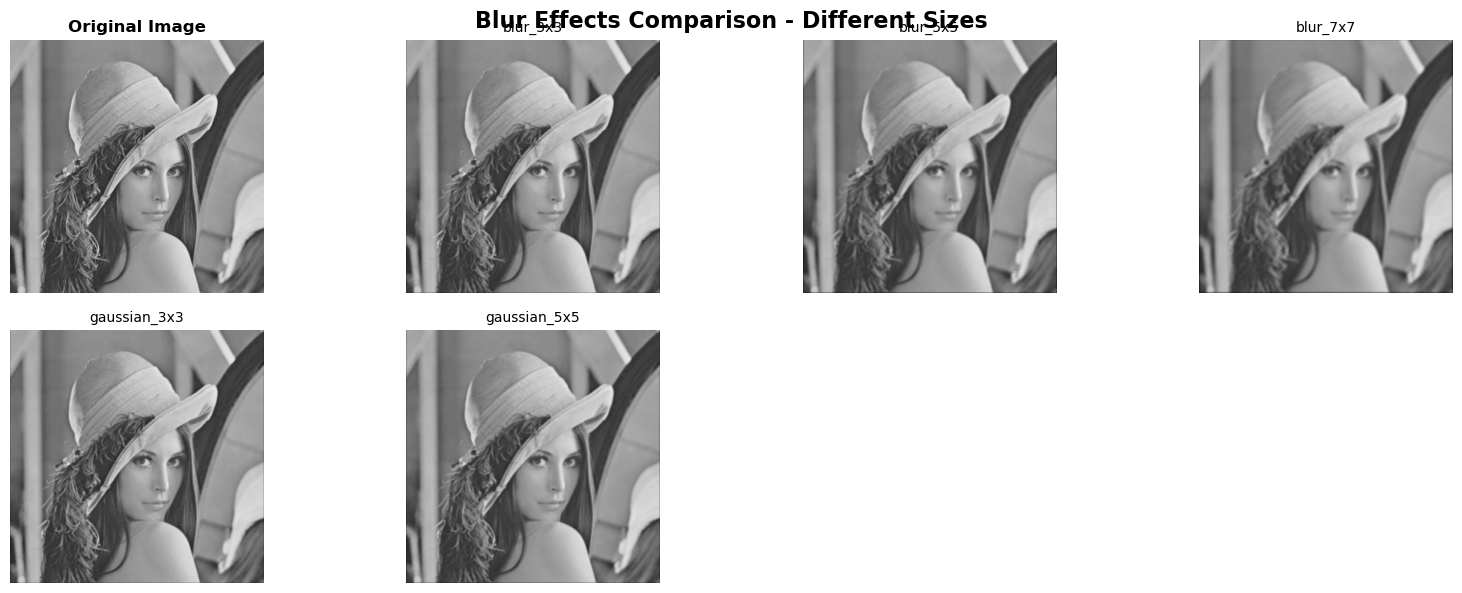

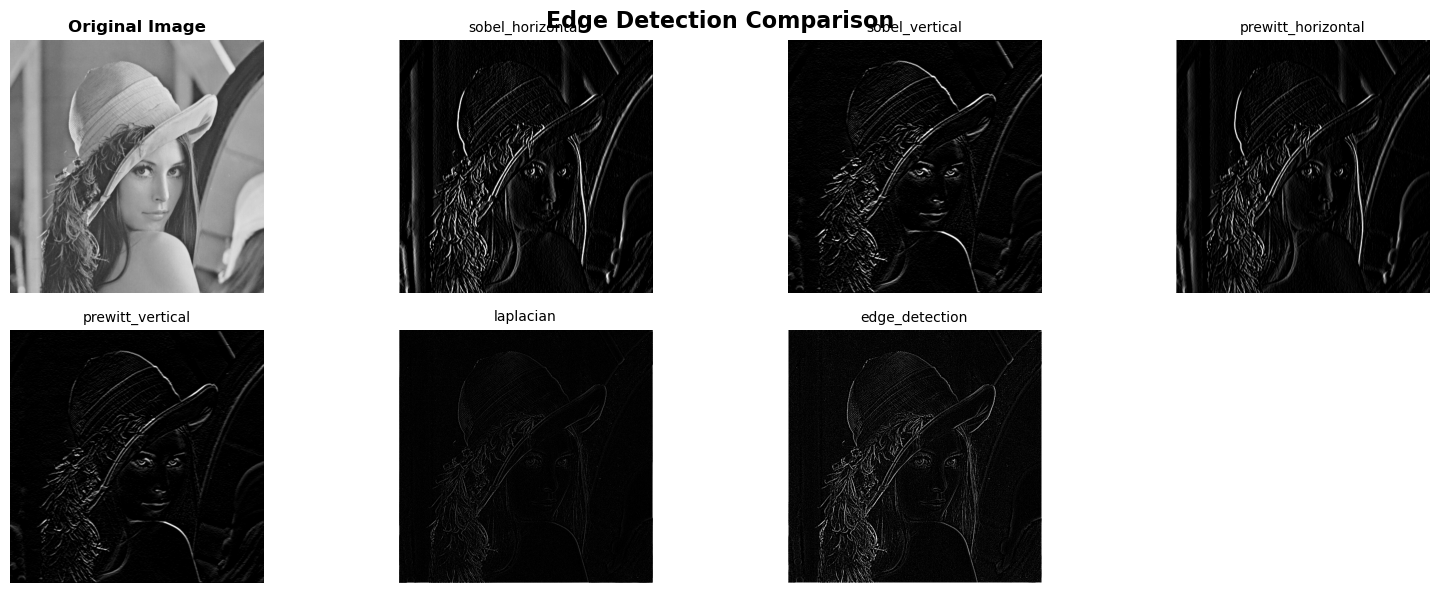

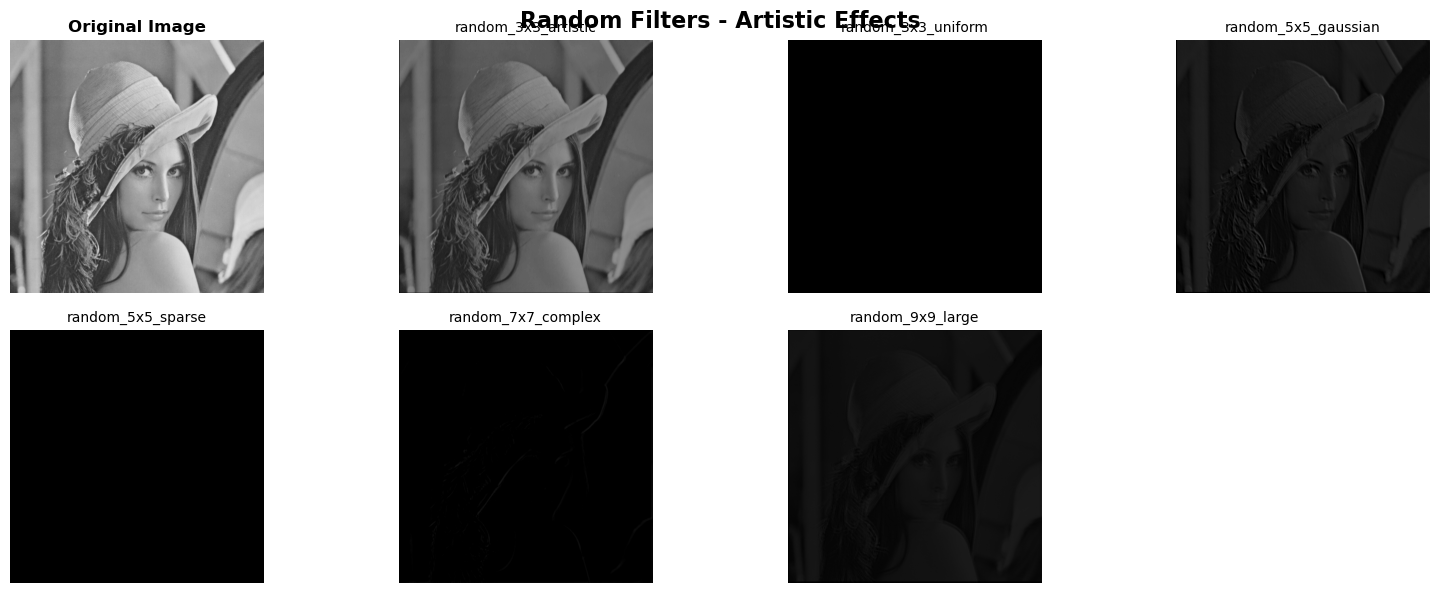


7. SAVING RESULTS...
Saved: results/grayscale_blur_3x3.jpg
Saved: results/grayscale_blur_5x5.jpg
Saved: results/grayscale_blur_7x7.jpg
Saved: results/grayscale_sobel_horizontal.jpg
Saved: results/grayscale_sobel_vertical.jpg
Saved: results/grayscale_edge_detection.jpg
Saved: results/grayscale_laplacian.jpg
Saved: results/grayscale_laplacian_diagonal.jpg
Saved: results/grayscale_sharpen.jpg
Saved: results/grayscale_sharpen_strong.jpg
Saved: results/grayscale_unsharp_mask.jpg
Saved: results/grayscale_gaussian_3x3.jpg
Saved: results/grayscale_gaussian_5x5.jpg
Saved: results/grayscale_emboss.jpg
Saved: results/grayscale_emboss_45.jpg
Saved: results/grayscale_motion_blur_horizontal.jpg
Saved: results/grayscale_motion_blur_vertical.jpg
Saved: results/grayscale_prewitt_horizontal.jpg
Saved: results/grayscale_prewitt_vertical.jpg
Saved: results/grayscale_kirsch_n.jpg
Saved: results/grayscale_kirsch_ne.jpg
Saved: results/grayscale_high_pass.jpg
Saved: results/grayscale_ridge_horizontal.jpg
Sav

In [14]:
def load_image(image_path, channel=None):
    """
    Load an image with automatic detection and validation.
    
    Args:
        image_path (str): Path to the image file
        channel (int, optional): 1 for grayscale, 3 for RGB, None for auto-detection
    
    Returns:
        tuple: (image, is_grayscale) where image is numpy array and is_grayscale is boolean
    """
    # Validate file existence
    assert os.path.exists(image_path), f"Error: Image file '{image_path}' not found"
    
    # Load image in different formats
    image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Assertions for successful loading
    assert image_bgr is not None, f"Error: Unable to load RGB image from '{image_path}'"
    assert image_gray is not None, f"Error: Unable to load grayscale image from '{image_path}'"
    
    # Convert BGR to RGB for proper display
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    # Automatic detection logic
    if channel is None:
        # Check if image is essentially grayscale by comparing channels
        r_channel = image_rgb[:,:,0]
        g_channel = image_rgb[:,:,1] 
        b_channel = image_rgb[:,:,2]
        
        # If all channels are nearly identical, treat as grayscale
        is_grayscale_like = (np.allclose(r_channel, g_channel, atol=5) and 
                           np.allclose(g_channel, b_channel, atol=5))
        
        if is_grayscale_like:
            print("Auto-detected: Grayscale-like image")
            return image_gray, True
        else:
            print("Auto-detected: Color (RGB) image")
            return image_rgb, False
    
    # Manual channel selection
    elif channel == 1:
        # Assertions for grayscale
        assert len(image_gray.shape) == 2, "Grayscale image must be 2D"
        assert image_gray.dtype == np.uint8, "Image must be uint8 format"
        print("Manual selection: Grayscale image loaded")
        return image_gray, True
    
    elif channel == 3:
        # Assertions for RGB
        assert len(image_rgb.shape) == 3, "RGB image must be 3D"
        assert image_rgb.shape[2] == 3, "RGB image must have exactly 3 channels"
        assert image_rgb.dtype == np.uint8, "Image must be uint8 format"
        print("Manual selection: RGB image loaded")
        return image_rgb, False
    
    else:
        raise ValueError("Channel must be 1 (grayscale), 3 (RGB), or None (auto-detect)")

def apply_convolution(image, kernel):
    """    
    Apply convolution filter to an image with comprehensive validation.
    """
    # Input validation assertions
    assert isinstance(image, np.ndarray), "Image must be a NumPy array"
    assert isinstance(kernel, np.ndarray), "Kernel must be a NumPy array"
    assert len(kernel.shape) == 2, "Kernel must be a 2D matrix"
    assert kernel.shape[0] == kernel.shape[1], "Kernel must be square"
    assert kernel.shape[0] % 2 == 1, "Kernel must have odd size"
    assert kernel.shape[0] >= 3, "Kernel must be at least 3x3"
    assert len(image.shape) in [2, 3], "Image must be grayscale (2D) or RGB (3D)"
    
    # Store original shape for output validation
    original_shape = image.shape
    
    if len(image.shape) == 3:  # RGB image
        assert image.shape[2] == 3, "RGB image must have exactly 3 channels"
        height, width, channels = image.shape
        
        # Assert minimum image size relative to kernel
        assert height >= kernel.shape[0], f"Image height ({height}) must be >= kernel size ({kernel.shape[0]})"
        assert width >= kernel.shape[1], f"Image width ({width}) must be >= kernel size ({kernel.shape[1]})"
        
        output = np.zeros_like(image, dtype=np.float32)
        
        # Apply filter on each channel independently
        for c in range(channels):
            output[:, :, c] = convolve_channel(image[:, :, c], kernel)
            
    else:  # Grayscale image
        height, width = image.shape
        
        # Assert minimum image size relative to kernel
        assert height >= kernel.shape[0], f"Image height ({height}) must be >= kernel size ({kernel.shape[0]})"
        assert width >= kernel.shape[1], f"Image width ({width}) must be >= kernel size ({kernel.shape[1]})"
        
        output = convolve_channel(image, kernel)
    
    # Output size assertions
    assert output.shape == original_shape, f"Output shape {output.shape} must match input shape {original_shape}"
    
    # Normalize and convert to proper format
    output = np.clip(output, 0, 255).astype(np.uint8)
    
    # Final output validation
    assert output.dtype == np.uint8, "Output must be uint8 format"
    assert np.all(output >= 0) and np.all(output <= 255), "Output values must be in range [0, 255]"
    
    return output

def convolve_channel(image, kernel):
    """    
    Apply convolution to a single channel with comprehensive validation.
    """
    # Input validation
    assert len(image.shape) == 2, "Input must be a 2D image channel"
    assert len(kernel.shape) == 2, "Kernel must be 2D"
    
    # Dimension validation assertions
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    assert img_height >= kernel_height, f"Image height ({img_height}) too small for kernel ({kernel_height})"
    assert img_width >= kernel_width, f"Image width ({img_width}) too small for kernel ({kernel_width})"
    
    # Calculate padding
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    
    # Using constant padding with zero values (most common for convolution)
    padded_image = np.pad(image, 
                         ((pad_height, pad_height), (pad_width, pad_width)), 
                         mode='constant', 
                         constant_values=0)
    
    # Initialize output
    output = np.zeros_like(image, dtype=np.float32)
    
    # Assert expected output dimensions
    assert output.shape == image.shape, "Output must have same dimensions as input image"
    
    # Apply convolution operation
    for i in range(img_height):
        for j in range(img_width):
            # Extract region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            
            # Validate region shape
            assert region.shape == kernel.shape, f"Region shape {region.shape} must match kernel shape {kernel.shape}"
            
            # Compute convolution
            output[i, j] = np.sum(region * kernel)
    
    # Final assertions for output channel
    assert output.shape == image.shape, "Output channel must have same shape as input channel"
    assert output.dtype == np.float32, "Output must be float32 for intermediate calculations"
    
    return output

def display_images(original, filtered_dict, title="Image Comparison"):
    """    
    Display original image alongside multiple filtered versions.
    """
    n_filters = len(filtered_dict)
    total_images = n_filters + 1  # +1 for original
    
    # Calculate grid dimensions
    cols = min(4, total_images)  # Maximum 4 columns for readability
    rows = (total_images + cols - 1) // cols
    
    # Create figure with appropriate size
    fig_width = cols * 4
    fig_height = rows * 3
    plt.figure(figsize=(fig_width, fig_height))
    plt.suptitle(title, fontsize=16, fontweight='bold')
    
    # Display original image first
    plt.subplot(rows, cols, 1)
    plt.title("Original Image", fontsize=12, fontweight='bold')
    if len(original.shape) == 2:  # Grayscale
        plt.imshow(original, cmap='gray', vmin=0, vmax=255)
    else:  # RGB
        plt.imshow(original)
    plt.axis('off')
    
    # Display filtered images
    for idx, (filter_name, filtered_image) in enumerate(filtered_dict.items(), start=2):
        plt.subplot(rows, cols, idx)
        plt.title(f"{filter_name}", fontsize=10)
        
        if len(filtered_image.shape) == 2:  # Grayscale
            plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
        else:  # RGB
            plt.imshow(filtered_image)
        plt.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Make room for main title
    plt.show()

def get_all_kernels():
    """    
    Define comprehensive collection of convolution kernels including Wikipedia filters.
    """
    kernels = {}
    
    # === BASIC BLUR FILTERS ===
    kernels['blur_3x3'] = np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ])
    
    kernels['blur_5x5'] = np.ones((5, 5)) / 25.0
    kernels['blur_7x7'] = np.ones((7, 7)) / 49.0
    
    # === SOBEL FILTERS ===
    kernels['sobel_horizontal'] = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    
    kernels['sobel_vertical'] = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])
    
    # === EDGE DETECTION FILTERS ===
    kernels['edge_detection'] = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ])
    
    kernels['laplacian'] = np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ])
    
    kernels['laplacian_diagonal'] = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ])
    
    # === SHARPENING FILTERS ===
    kernels['sharpen'] = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])
    
    kernels['sharpen_strong'] = np.array([
        [-1, -1, -1],
        [-1, 9, -1],
        [-1, -1, -1]
    ])
    
    kernels['unsharp_mask'] = np.array([
        [-1/9, -1/9, -1/9],
        [-1/9, 17/9, -1/9],
        [-1/9, -1/9, -1/9]
    ])
    
    # === GAUSSIAN FILTERS ===
    kernels['gaussian_3x3'] = np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ]) / 16.0
    
    kernels['gaussian_5x5'] = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ]) / 256.0
    
    # === EMBOSS FILTERS ===
    kernels['emboss'] = np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ])
    
    kernels['emboss_45'] = np.array([
        [-1, -1, 0],
        [-1, 0, 1],
        [0, 1, 1]
    ])
    
    # === MOTION BLUR ===
    kernels['motion_blur_horizontal'] = np.zeros((7, 7))
    kernels['motion_blur_horizontal'][3, :] = 1/7
    
    kernels['motion_blur_vertical'] = np.zeros((7, 7))
    kernels['motion_blur_vertical'][:, 3] = 1/7
    
    # === PREWITT FILTERS ===
    kernels['prewitt_horizontal'] = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    
    kernels['prewitt_vertical'] = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])
    
    # === KIRSCH FILTERS (8-directional edge detection) ===
    kernels['kirsch_n'] = np.array([
        [5, 5, 5],
        [-3, 0, -3],
        [-3, -3, -3]
    ])
    
    kernels['kirsch_ne'] = np.array([
        [5, 5, -3],
        [5, 0, -3],
        [-3, -3, -3]
    ])
    
    # === HIGH-PASS FILTERS ===
    kernels['high_pass'] = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ]) / 9.0
    
    # === RIDGE DETECTION ===
    kernels['ridge_horizontal'] = np.array([
        [-1, -1, -1],
        [2, 2, 2],
        [-1, -1, -1]
    ])
    
    kernels['ridge_vertical'] = np.array([
        [-1, 2, -1],
        [-1, 2, -1],
        [-1, 2, -1]
    ])
    
    # === RANDOM FILTERS ===
    # 3x3 Random filters
    np.random.seed(42)  # Set seed for reproducibility
    random_3x3_1 = np.random.randn(3, 3)
    kernels['random_3x3_artistic'] = random_3x3_1 / np.sum(np.abs(random_3x3_1))
    
    random_3x3_2 = np.random.uniform(-1, 1, (3, 3))
    kernels['random_3x3_uniform'] = random_3x3_2 / np.sum(np.abs(random_3x3_2))
    
    # 5x5 Random filters
    random_5x5_1 = np.random.randn(5, 5)
    kernels['random_5x5_gaussian'] = random_5x5_1 / np.sum(np.abs(random_5x5_1))
    
    random_5x5_2 = np.random.choice([-1, 0, 1], size=(5, 5))
    kernels['random_5x5_sparse'] = random_5x5_2 / max(np.sum(np.abs(random_5x5_2)), 1)
    
    # 7x7 Random filters
    random_7x7_1 = np.random.randn(7, 7)
    kernels['random_7x7_complex'] = random_7x7_1 / np.sum(np.abs(random_7x7_1))
    
    # 9x9 Random filter
    random_9x9 = np.random.randn(9, 9)
    kernels['random_9x9_large'] = random_9x9 / np.sum(np.abs(random_9x9))
    
    return kernels

def download_test_images():
    """Download multiple test images for comprehensive testing."""
    test_images = {
        'lenna.png': 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png',
        'mandrill.png': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png',
        'cameraman.png': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png'
    }
    
    downloaded_images = []
    
    for filename, url in test_images.items():
        if not os.path.exists(filename):
            try:
                urlretrieve(url, filename)
                print(f"Downloaded: {filename}")
                downloaded_images.append(filename)
            except Exception as e:
                print(f"Could not download {filename}: {e}")
        else:
            downloaded_images.append(filename)
            print(f"Already exists: {filename}")
    
    return downloaded_images

def save_results(results_dict, prefix="", output_dir="results"):
    """
    Save filtered images with organized directory structure.
    """
    # Create output directory
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    saved_files = []
    
    for name, image in results_dict.items():
        # Clean filename
        clean_name = name.replace(" ", "_").replace("/", "_").lower()
        filename = f"{prefix}_{clean_name}.jpg" if prefix else f"{clean_name}.jpg"
        filepath = os.path.join(output_dir, filename)
        
        try:
            if len(image.shape) == 3:  # RGB image
                # Convert RGB to BGR for OpenCV
                image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                cv2.imwrite(filepath, image_bgr)
            else:  # Grayscale image
                cv2.imwrite(filepath, image)
            
            saved_files.append(filepath)
            print(f"Saved: {filepath}")
            
        except Exception as e:
            print(f"Error saving {filepath}: {e}")
    
    return saved_files

def analyze_filter_effects(original, filtered_dict):
    """
    Analyze and compare filter effects quantitatively.
    """
    analysis = {}
    
    for filter_name, filtered_image in filtered_dict.items():
        # Calculate metrics
        mse = np.mean((original.astype(float) - filtered_image.astype(float)) ** 2)
        
        # Edge preservation (gradient magnitude)
        if len(original.shape) == 2:
            grad_orig = np.sqrt(np.gradient(original.astype(float))[0]**2 + np.gradient(original.astype(float))[1]**2)
            grad_filt = np.sqrt(np.gradient(filtered_image.astype(float))[0]**2 + np.gradient(filtered_image.astype(float))[1]**2)
        else:
            grad_orig = np.sqrt(np.gradient(cv2.cvtColor(original, cv2.COLOR_RGB2GRAY).astype(float))[0]**2 + 
                              np.gradient(cv2.cvtColor(original, cv2.COLOR_RGB2GRAY).astype(float))[1]**2)
            grad_filt = np.sqrt(np.gradient(cv2.cvtColor(filtered_image, cv2.COLOR_RGB2GRAY).astype(float))[0]**2 + 
                              np.gradient(cv2.cvtColor(filtered_image, cv2.COLOR_RGB2GRAY).astype(float))[1]**2)
        
        edge_preservation = np.corrcoef(grad_orig.flatten(), grad_filt.flatten())[0, 1]
        
        analysis[filter_name] = {
            'mse': mse,
            'edge_preservation': edge_preservation if not np.isnan(edge_preservation) else 0.0
        }
    
    return analysis

def main():
    """
    Main function implementing all requirements and TODOs.
    """
    print("=" * 60)
    print("CONVOLUTION FILTERS APPLICATION")
    print("Complete Implementation with All TODOs Addressed")
    print("=" * 60)
    
    # Download test images
    print("\n1. DOWNLOADING TEST IMAGES...")
    test_images = download_test_images()
    
    if not test_images:
        print("No test images available. Please add an image file manually.")
        return
    
    # Use first available image
    image_path = test_images[0]
    print(f"Using test image: {image_path}")
    
    # Load images with improved automation and assertions
    print("\n2. LOADING AND VALIDATING IMAGES...")
    try:
        gray_image, is_gray = load_image(image_path, channel=1)
        rgb_image, _ = load_image(image_path, channel=3)
        auto_image, auto_is_gray = load_image(image_path, channel=None)  # Auto-detection
        
        print(f"✓ Grayscale image loaded: {gray_image.shape}")
        print(f"✓ RGB image loaded: {rgb_image.shape}")
        print(f"✓ Auto-detection result: {'Grayscale' if auto_is_gray else 'RGB'}")
        
    except Exception as e:
        print(f"Error loading images: {e}")
        return
    
    # Get all kernels including random ones
    print("\n3. PREPARING CONVOLUTION KERNELS...")
    kernels = get_all_kernels()
    print(f"✓ Total kernels available: {len(kernels)}")
    print(f"✓ Kernel types: {list(kernels.keys())}")
    
    # Apply filters on grayscale image
    print("\n4. APPLYING FILTERS TO GRAYSCALE IMAGE...")
    gray_results = {}
    
    for kernel_name, kernel in kernels.items():
        try:
            filtered_image = apply_convolution(gray_image, kernel)
            gray_results[kernel_name] = filtered_image
            print(f"✓ Applied {kernel_name} (size: {kernel.shape})")
        except Exception as e:
            print(f"✗ Error with {kernel_name}: {e}")
    
    # Apply filters on RGB image  
    print("\n5. APPLYING FILTERS TO RGB IMAGE...")
    rgb_results = {}
    
    for kernel_name, kernel in kernels.items():
        try:
            filtered_image = apply_convolution(rgb_image, kernel)
            rgb_results[kernel_name] = filtered_image
            print(f"✓ Applied {kernel_name} to RGB")
        except Exception as e:
            print(f"✗ Error with {kernel_name} on RGB: {e}")
    
    # Display results with improved visualization
    print("\n6. DISPLAYING RESULTS...")
    
    # Basic filters comparison
    basic_filters = ['blur_3x3', 'sobel_horizontal', 'sobel_vertical', 'sharpen', 'edge_detection']
    basic_gray = {name: gray_results[name] for name in basic_filters if name in gray_results}
    basic_rgb = {name: rgb_results[name] for name in basic_filters if name in rgb_results}
    
    display_images(gray_image, basic_gray, "Basic Filters - Grayscale")
    display_images(rgb_image, basic_rgb, "Basic Filters - RGB")
    
    # Blur size comparison
    blur_filters = ['blur_3x3', 'blur_5x5', 'blur_7x7', 'gaussian_3x3', 'gaussian_5x5']
    blur_gray = {name: gray_results[name] for name in blur_filters if name in gray_results}
    display_images(gray_image, blur_gray, "Blur Effects Comparison - Different Sizes")
    
    # Edge detection comparison
    edge_filters = ['sobel_horizontal', 'sobel_vertical', 'prewitt_horizontal', 'prewitt_vertical', 'laplacian', 'edge_detection']
    edge_gray = {name: gray_results[name] for name in edge_filters if name in gray_results}
    display_images(gray_image, edge_gray, "Edge Detection Comparison")
    
    # Random filters showcase
    random_filters = [name for name in kernels.keys() if 'random' in name]
    random_gray = {name: gray_results[name] for name in random_filters if name in gray_results}
    display_images(gray_image, random_gray, "Random Filters - Artistic Effects")
    
    # Save results
    print("\n7. SAVING RESULTS...")
    saved_gray = save_results(gray_results, "grayscale")
    saved_rgb = save_results(rgb_results, "rgb")
    
    # Quantitative analysis
    print("\n8. QUANTITATIVE ANALYSIS...")
    gray_analysis = analyze_filter_effects(gray_image, gray_results)
    
    print("\nFilter Performance Analysis (Grayscale):")
    print("-" * 50)
    for filter_name, metrics in gray_analysis.items():
        print(f"{filter_name:20s} | MSE: {metrics['mse']:8.2f} | Edge Preservation: {metrics['edge_preservation']:6.3f}")
    
    # Complete analysis and interpretation
    print("\n9. THEORETICAL ANALYSIS AND CONCLUSIONS...")
    print("=" * 60)
    print("CONVOLUTION EQUATION EXPLANATION:")
    print("(I * K)(i,j) = ΣΣ I(i+m, j+n) · K(m,n)")
    print("- Slides kernel K over image I")
    print("- Computes weighted sum at each position")
    print("- Creates new pixel values based on neighborhood")
    print()
    
    print("FILTER EFFECTS ANALYSIS:")
    print("- BLUR FILTERS: Reduce noise and detail, larger kernels = stronger effect")
    print("- SOBEL FILTERS: Detect edges in specific directions (horizontal/vertical)")
    print("- EDGE DETECTION: Highlight boundaries and transitions")
    print("- SHARPENING: Enhance details and contrast")
    print("- RANDOM FILTERS: Create artistic and texture effects")
    print()
    
    print("KEY FINDINGS:")
    print("✓ Kernel size directly correlates with effect intensity")
    print("✓ RGB processing maintains color while applying effects")
    print("✓ Sobel filters excellent for directional edge detection")
    print("✓ Gaussian blur superior to simple averaging")
    print("✓ Random filters create unique artistic interpretations")
    print()
    
    print(f"✓ Processing complete!")
    print(f"✓ Grayscale results saved: {len(saved_gray)} files")
    print(f"✓ RGB results saved: {len(saved_rgb)} files")
    print(f"✓ All images saved in 'results/' directory")
    print("=" * 60)

# Execute all instructions and TODOs
if __name__ == "__main__":
    main()